In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
queries_df = pd.read_json('../../data/exported/places_o200000_q2500000_scaled.json', lines=True);
queries_df = queries_df.iloc[200000:, :].reset_index(drop=True).drop(columns=['id']).reset_index()

queries_df.tail()

,index,x,y,keywords,scaled
2499995,2499995,409.894898,103.097463,"[telephone, cellular]",True
2499996,2499996,402.284307,107.998284,[contractor],True
2499997,2499997,406.953882,110.040834,[church],True
2499998,2499998,412.621720,107.253521,"[lounge, drinking, eating, cocktail]",True
2499999,2499999,412.835319,107.262331,"[coping, plastering, tiling, pool, swimming]",True


In [3]:
queries_df.keywords.values

array([list(['physician', 'surgeon']), list(['roofing', 'consultant']),
       list(['appliance']), ..., list(['church']),
       list(['lounge', 'drinking', 'eating', 'cocktail']),
       list(['coping', 'plastering', 'tiling', 'pool', 'swimming'])],
      dtype=object)

In [4]:
all_keywords = [x for xs in queries_df.keywords.values for x in xs]
count = pd.DataFrame(pd.Series(all_keywords).value_counts()).reset_index().reset_index().rename(columns={'level_0': 'i'})
count

,i,index,count
0,0,contractor,220521
1,1,mfg,68901
2,2,general,66912
3,3,equipment,63266
4,4,automobile,62983
...,...,...,...
8999,8999,theory,1
9000,9000,leveraged,1
9001,9001,indigo,1
9002,9002,challenge,1


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

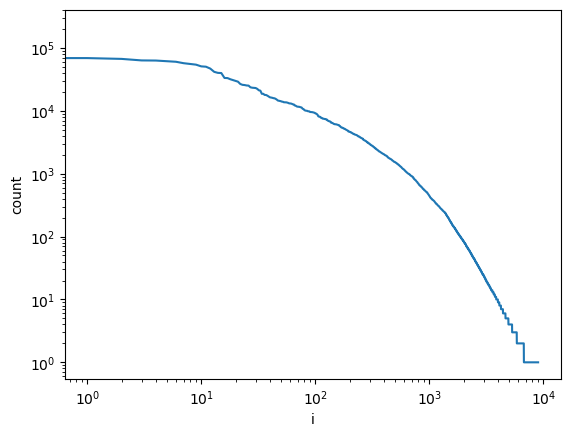

In [5]:
sns.lineplot(x='i', y='count', data=count)
plt.xscale('log')
plt.yscale('log')

In [6]:
create_time = pd.read_csv("../results_03_15/FAST_KNN_NO_ObjIndex_L9_search_sub_timeline_2500000_100000.csv", names=['obj_search', 'insert', 'ar', 'des_count', 'level']).reset_index()
create_time['name'] = 'fast'
create_time['obj_search'] = create_time['obj_search'] / 1000000
create_time['insert'] = create_time['insert'] / 1000000
create_melt_time = create_time.melt(id_vars=['index', 'name', 'ar', 'des_count', 'level'], var_name='stage', value_name='time')

create_melt_time

,index,name,ar,des_count,level,stage,time
0,0,fast,2.646341,0,9,obj_search,8.181625
1,1,fast,17.806978,0,9,obj_search,7.622545
2,2,fast,113.705647,0,9,obj_search,0.206345
3,3,fast,9.208080,0,9,obj_search,0.109322
4,4,fast,1.264358,0,9,obj_search,0.342787
...,...,...,...,...,...,...,...
4999995,2499995,fast,0.243780,0,9,insert,0.001155
4999996,2499996,fast,3.895217,0,9,insert,0.001094
4999997,2499997,fast,8.129695,0,9,insert,0.002577
4999998,2499998,fast,70.579975,0,9,insert,0.001430


In [7]:
stats = create_time.copy()
stats = queries_df.join(stats.set_index('index'), on='index').dropna()

In [8]:
stats

,index,x,y,keywords,scaled,obj_search,insert,ar,des_count,level,name
0,0,282.138698,151.113065,"[physician, surgeon]",True,8.181625,3.089643,2.646341,0,9,fast
1,1,295.309161,141.425445,"[roofing, consultant]",True,7.622545,0.033553,17.806978,0,9,fast
2,2,294.304889,141.179529,[appliance],True,0.206345,0.018248,113.705647,0,9,fast
3,3,294.975799,140.572582,"[electric, motor]",True,0.109322,0.016267,9.208080,0,9,fast
4,4,295.225233,140.466756,"[plant, packing]",True,0.342787,0.017268,1.264358,0,9,fast
...,...,...,...,...,...,...,...,...,...,...,...
2499995,2499995,409.894898,103.097463,"[telephone, cellular]",True,0.869409,0.001155,0.243780,0,9,fast
2499996,2499996,402.284307,107.998284,[contractor],True,0.079392,0.001094,3.895217,0,9,fast
2499997,2499997,406.953882,110.040834,[church],True,0.652619,0.002577,8.129695,0,9,fast
2499998,2499998,412.621720,107.253521,"[lounge, drinking, eating, cocktail]",True,0.008221,0.001430,70.579975,0,9,fast


In [9]:
exploded = stats.explode('keywords').reset_index(drop=True)

In [15]:
key_vs_time = exploded.loc[:, ['keywords', 'obj_search', 'insert']].groupby('keywords').mean().reset_index()

In [28]:
obj_key_time = key_vs_time.loc[:, ['keywords', 'obj_search']].sort_values('obj_search', ascending=False)
obj_ins_time = key_vs_time.loc[:, ['keywords', 'insert']].sort_values('insert', ascending=False)

/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'obj. index search time')

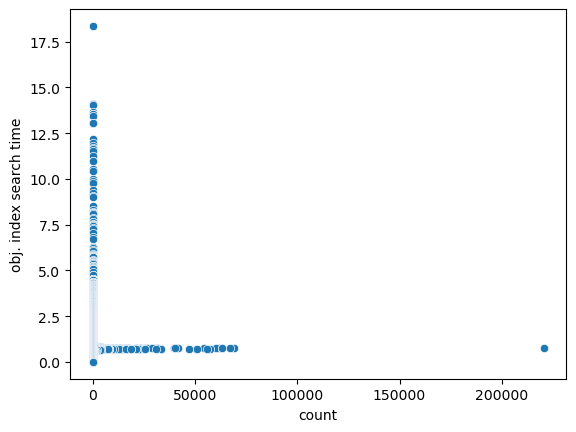

In [35]:
obj_out = obj_key_time.join(count.set_index('index'), on='keywords')

sns.scatterplot(x='count', y='obj_search', data=obj_out)
plt.ylabel('obj. index search time')

/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(0.0, 10.0)

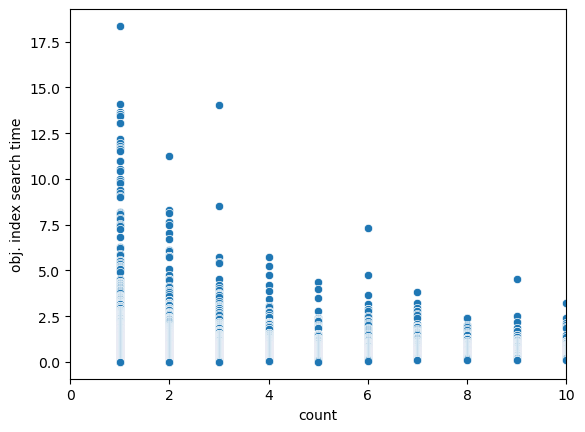

In [36]:
sns.scatterplot(x='count', y='obj_search', data=obj_out)
plt.ylabel('obj. index search time')
plt.xlim(0, 10)

/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='insert'>

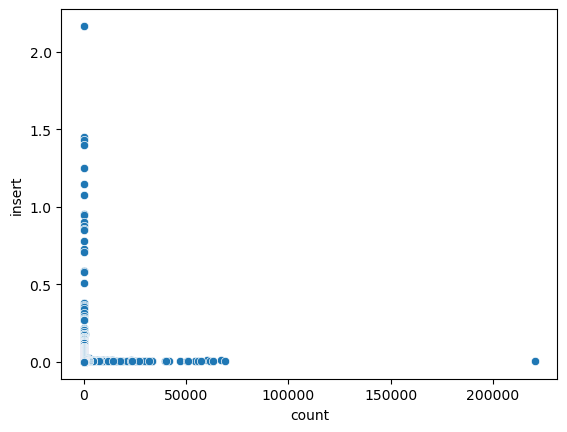

In [33]:
ins_out = obj_ins_time.join(count.set_index('index'), on='keywords')

sns.scatterplot(x='count', y='insert', data=ins_out)

/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(0.0, 10.0)

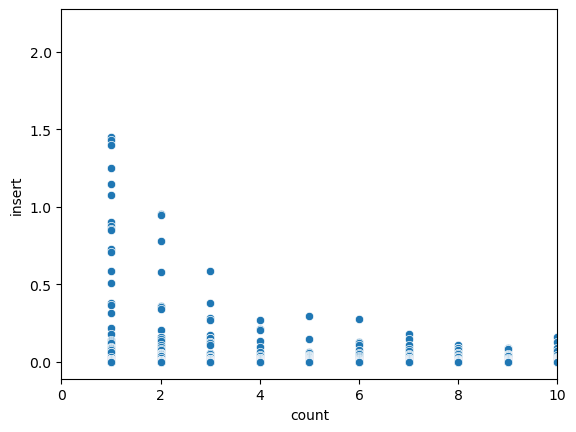

In [34]:
sns.scatterplot(x='count', y='insert', data=ins_out)
plt.xlim(0, 10)